## babble

A character level bigram model that tries to learn statistical relationships in the swahili language, to generate new text.

### 1. Load and inspect the data

In [ ]:
data = open("../data/train.txt", "r").read()
text = data.replace("UNK", '').replace('\n', '')
set(text), len(set(text))

({' ',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'},
 27)

In [10]:
# The test data has 28k unique words and about 1M words in total
# We will use the full dataset since repetion is good for the bigram to be more confident
b = {}
for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
    bigram = (ch1, ch2, ch3)
    b[bigram] = b.get(bigram, 0) + 1
    # print(ch1, ch2)
print(b)

{(' ', 't', 'a'): 20575, ('t', 'a', 'a'): 4940, ('a', 'a', 'r'): 2477, ('a', 'r', 'i'): 16358, ('r', 'i', 'f'): 2184, ('i', 'f', 'a'): 8656, ('f', 'a', ' '): 6781, ('a', ' ', 'h'): 38916, (' ', 'h', 'i'): 31691, ('h', 'i', 'y'): 11706, ('i', 'y', 'o'): 17007, ('y', 'o', ' '): 29653, ('o', ' ', 'i'): 6630, (' ', 'i', 'l'): 12862, ('i', 'l', 'i'): 43242, ('l', 'i', 's'): 20727, ('i', 's', 'e'): 14747, ('s', 'e', 'm'): 18701, ('e', 'm', 'a'): 21320, ('m', 'a', ' '): 42281, ('a', ' ', 'k'): 144990, (' ', 'k', 'u'): 117486, ('k', 'u', 'w'): 35038, ('u', 'w', 'a'): 35071, ('w', 'a', ' '): 150647, ('a', ' ', 'o'): 2184, (' ', 'o', 'n'): 381, ('o', 'n', 'g'): 9760, ('n', 'g', 'e'): 9012, ('g', 'e', 'z'): 2674, ('e', 'z', 'e'): 2829, ('z', 'e', 'k'): 1013, ('e', 'k', 'o'): 835, ('k', 'o', ' '): 6128, ('o', ' ', 'l'): 7599, (' ', 'l', 'a'): 18398, ('l', 'a', ' '): 25830, ('a', ' ', 'j'): 12384, (' ', 'j', 'o'): 1121, ('j', 'o', 't'): 92, ('o', 't', 'o'): 4244, ('t', 'o', ' '): 5034, ('a', ' ', '

In [11]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('w', 'a', ' '), 150647),
 (('a', ' ', 'k'), 144990),
 (('n', 'a', ' '), 123227),
 ((' ', 'w', 'a'), 121137),
 ((' ', 'k', 'u'), 117486),
 (('a', ' ', 'm'), 101402),
 ((' ', 'n', 'a'), 90092),
 (('y', 'a', ' '), 82792),
 ((' ', 'y', 'a'), 79820),
 (('n', 'i', ' '), 70645),
 (('a', ' ', 'n'), 68158),
 (('a', 'l', 'i'), 66380),
 ((' ', 'm', 'a'), 59724),
 (('a', ' ', 'w'), 53681),
 (('k', 'a', ' '), 52069),
 (('a', 'n', 'a'), 51847),
 ((' ', 'k', 'a'), 45620),
 ((' ', 'k', 'w'), 45026),
 (('i', 'l', 'i'), 43242),
 (('m', 'a', ' '), 42281),
 (('i', ' ', 'k'), 42031),
 (('k', 'w', 'a'), 40841),
 (('i', 'k', 'a'), 39466),
 (('l', 'i', ' '), 39433),
 (('a', ' ', 'h'), 38916),
 ((' ', 'h', 'a'), 38410),
 (('i', 'a', ' '), 36642),
 (('w', 'a', 'n'), 35566),
 (('i', ' ', 'w'), 35551),
 (('a', 't', 'i'), 35300),
 (('u', 'w', 'a'), 35071),
 (('k', 'u', 'w'), 35038),
 (('z', 'a', ' '), 34860),
 (('m', 'b', 'a'), 34403),
 (('a', ' ', ' '), 34133),
 (('a', ' ', 's'), 34022),
 ((' ', 'h', 'i'), 316

In [12]:
# Instead of using a dictionary, we will use a pytrch array
import torch
N = torch.zeros((28, 28))
N

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [20]:
stoi = {s:i for i, s in enumerate(sorted(list(set(text))))}
itos = {i:s for i, s in enumerate(sorted(list(set(text))))}
stoi, itos

({' ': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 {0: ' ',
  1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z'})

In [14]:
B = torch.ones((27, 27, 27), dtype=torch.int32)

for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
    id1, id2, id3 = stoi[ch1], stoi[ch2], stoi[ch3]
    B[id1, id2, id3] += 1

B

tensor([[[10291, 11950,  4237,  ...,     7,  1067,   629],
         [  212,    86,   918,  ...,     2,    43,   434],
         [  103, 17532,    33,  ...,     1,    17,     1],
         ...,
         [   13,    16,     1,  ...,     3,     1,     1],
         [    5, 79821,     1,  ...,     1,     1,     1],
         [   16, 19348,     1,  ...,     1,     1,     1]],

        [[34134, 30959, 21504,  ...,    17, 29998, 11222],
         [ 6668,    45,   165,  ...,     1,    20,   110],
         [  120, 11771,    25,  ...,     1,    17,     1],
         ...,
         [    6,     1,     1,  ...,     1,     5,     1],
         [  298,  6221,     1,  ...,     1,     1,     1],
         [   36,  2997,    30,  ...,     1,     3,    32]],

        [[   55,    65,    38,  ...,     1,    14,     4],
         [16218,  8208,  3590,  ...,     1,  6609,  1617],
         [    6,    25,     1,  ...,     1,    13,     1],
         ...,
         [    1,     1,     1,  ...,     1,     1,     1],
         [

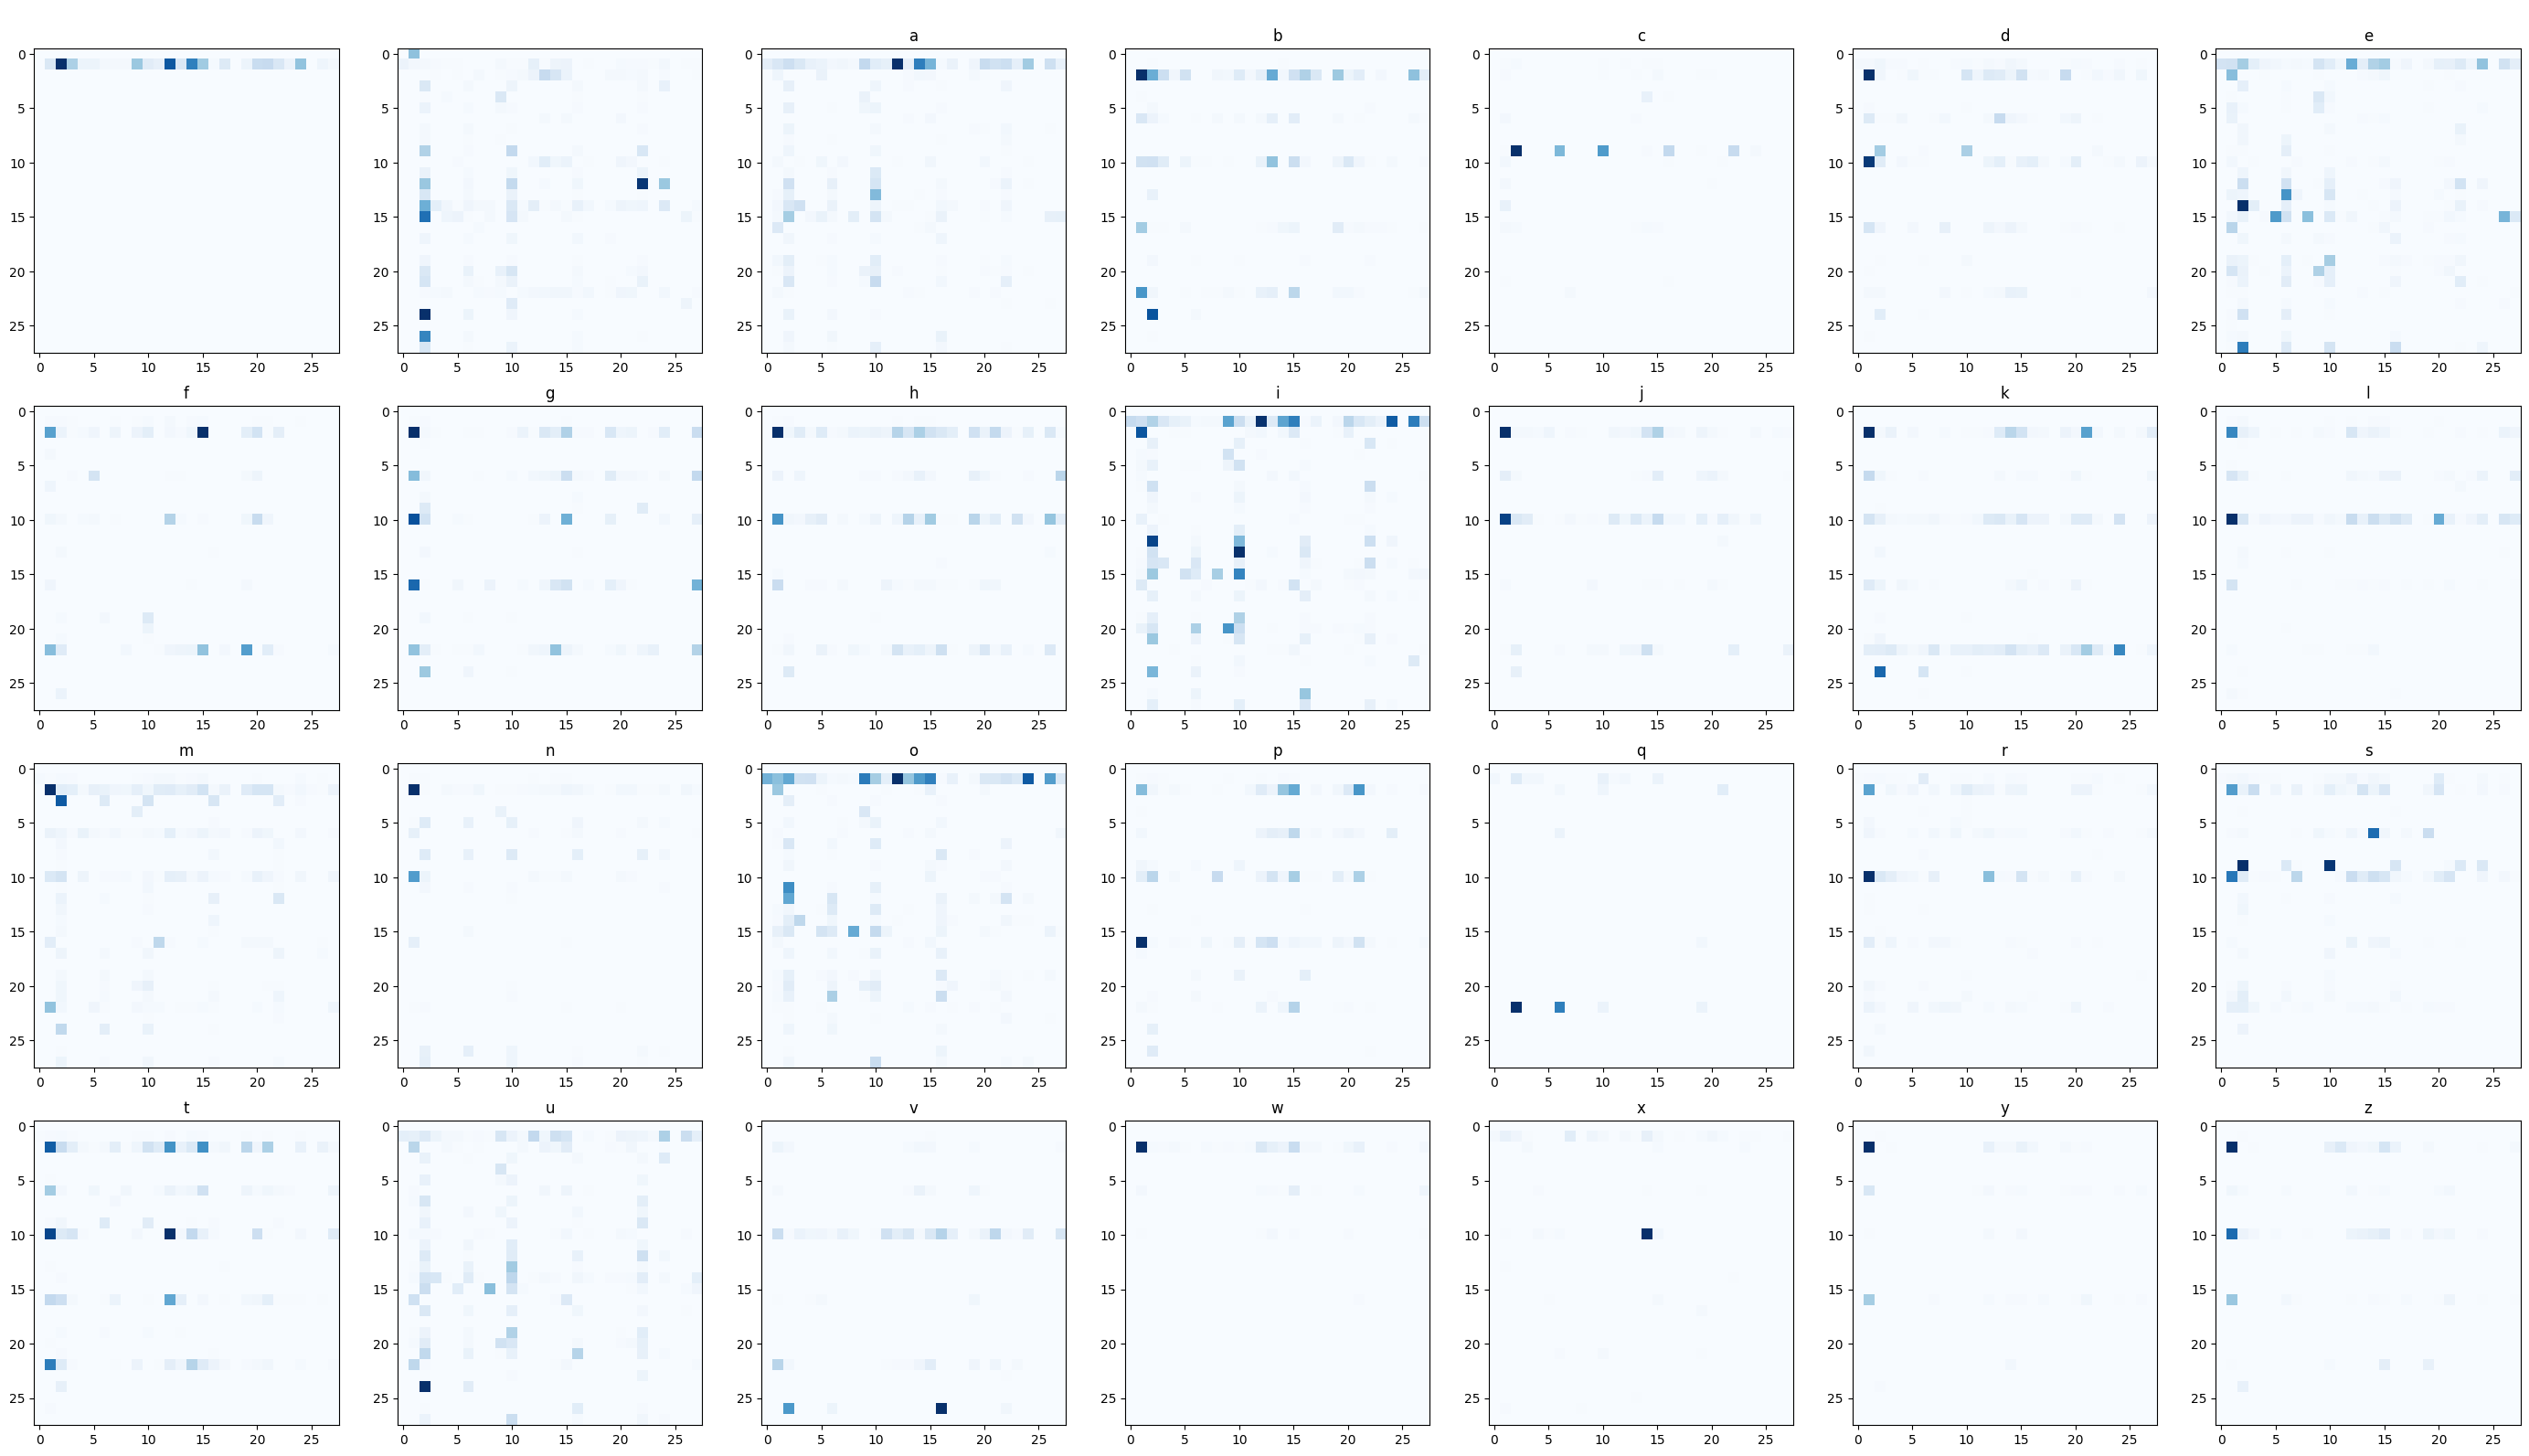

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 7, figsize=(28, 16))  # 4x7 grid = 28 plots

for idx, ax in enumerate(axes.flat):
    ax.imshow(B[idx].float().numpy(), cmap='Blues')
    ax.set_title(itos[idx])
    # ax.axis('off')

plt.tight_layout()
plt.show()

In [15]:
B.shape

torch.Size([27, 27, 27])

In [149]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 3, 8
P = B.float()
P = P / P.sum(2, keepdim=True)
while True:
    p = w[ix, ix2]
    out = torch.multinomial(p, num_samples=2, replacement=True, generator=g).sort(descending=True).values
    out2 = out[torch.randint(len(out), (1,))].item()
    ix, ix2 = ix2, out2
    output.append(itos[out2])
    if len(output) == 500:
        break
ix, ix2 = 3, 8
print(f"{itos[ix]}{itos[ix2]}{''.join(output)}")

RuntimeError: prob_dist must be 1 or 2 dim

In [ ]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
while True:
    p = P[ix, ix2]
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achetenza kuhukwewengina ja kuwa vyo 
 eshinv
ukuwa wa ya chaliongalika kutulavyodili wanne jilikiwati ho kiadhili huka re ambia kuara ulia 
 baya chemaenkono kabu wa mpini mbidesema vio laadawa kumauji wakupa na alima mpunguni tayo udiza vya si yakione huu hida wa ndombul alinia ini 
 bwa hinaliyale la kamu 
 kwa  ili wabadawizo mdolizi hi wanditikumsiwa hayanani uto wanga  wa ra johandalia pano es na nacha sa kuwa kwezo ni hiyo ya konjendersemaba wa  asasimbalipana ka wakt na ya shwaturi kua sad


In [ ]:
# test with temparature
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
temperature = 0.5
while True:
    p = P[ix, ix2]
    p = p ** (1 / temperature)
    p = p / p.sum()
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achati na kuhukwenya na ma ma wa kutoka kuwani kuwa wa ya cha wa kali na utata kwa ma wana kufuri wa kuwa kati ya na ka na ma ma kuwana kuwa kumia maba makini kuwa kuji ya ma wa kuwa ma ma alisha kuwa wa kita ma na na wa ka ungi ya kuwa si ya kuwa kwa ma kushili wa kutokuji kuwa na wa kuwa kuwalishi hirika wa kuwa   
 mindada na madi na wa kwa matikuwa wa kuwana hi na wana ka sita na kuwa ma pana kwa mana ma sa kuwa kwa na ku  na kwa kuja na si ha uwa masasimbalipana ka kushingo kwa kuwa kutua kuw


In [ ]:
g = torch.Generator().manual_seed(12482828)
output = []
ix, ix2 = 2, 4
P = B.float()
P = P / P.sum(2, keepdim=True)
temperature = 1.2
while True:
    k = 10
    p = P[ix, ix2].clone()
    p = p ** (1 / temperature)
    p = p / p.sum()
    top_k_vals, top_k_idx = torch.topk(p, k)
    mask = torch.zeros_like(p)
    mask[top_k_idx] = 1
    p = p * mask
    p = p / p.sum()
    out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    ix, ix2 = ix2, out
    output.append(itos[out])
    if len(output) == 500:
        break

print(f"{itos[2]}{itos[4]}{''.join(output)}")

achemenzakingo wewengina ha kuwa kardhizo nini kuwa wa ya kutu ya ngwandechuda kisema wano  hilikiwati ho kiadhilo hocashi mweleo kara ulia wa mia mtelimikono kabu wa mwini mbidesemabla wa allaka ya uwakisitis na alima mika uni waswilikwa mtakes sad mictikushidajwt rwgezaj alinia na mwa utarinatu ale ha kamu 
 kwal ili wanaofanzoma ulizi hiye amitikumefugodiyonanilinu wanga ya ki wa tandalia tano kwana nace 
 wa saa kwezo ni hiyoyoka nnegengwaza na we  asasimbalipanyumza kutungona shwatuo wa aliki


In [ ]:
import time

def generate_text(start: str, length = 500):
    g = torch.Generator().manual_seed(12482828)
    count = 0
    ix, ix2 = stoi[start[0]], stoi[start[1]]
    P = B.float()
    P = P / P.sum(2, keepdim=True)
    temperature = 1.2
    print(start, end='', flush=True)  # print the seed characters first

    while True:
        k = 10
        p = P[ix, ix2].clone()
        p = p ** (1 / temperature)
        p = p / p.sum()
        top_k_vals, top_k_idx = torch.topk(p, k)
        mask = torch.zeros_like(p)
        mask[top_k_idx] = 1
        p = p * mask
        p = p / p.sum()
        out = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        ix, ix2 = ix2, out
        print(itos[out], end='', flush=True)
        time.sleep(0.05)
        count += 1
        if count == length:
            break

    print(f"{start[0]}{start[1]}{''.join(output)}", end="", flush=True)

generate_text(start="ch")

chaktanzakingo wewengina ha kuwa kardhizo nini kuwa wa ya kutu ya ngwandechuda kisema wano  hilikiwati ho kiadhilo hocashi mweleo kara ulia wa mia mtelimikono kabu wa mwini mbidesemabla wa allaka ya uwakisitis na alima mika uni waswilikwa mtakes sad mictikushidajwt rwgezaj alinia na mwa utarinatu ale ha kamu 
 kwal ili wanaofanzoma ulizi hiye amitikumefugodiyonanilinu wanga ya ki wa tandalia tano kwana nace 
 wa saa kwezo ni hiyoyoka nnegengwaza na we  asasimbalipanyumza kutungona shwatuo wa alikichhetenza kuhukwewengina ja kuwa vyo 
 eshinv
ukuwa wa ya chaliongalika kutulavyodili wanne jilikiwati ho kiadhili huka re ambia kuara ulia 
 baya chemaenkono kabu wa mpini mbidesema vio laadawa kumauji wakupa na alima mpunguni tayo udiza vya si yakione huu hida wa ndombul alinia ini 
 bwa hinaliyale la kamu 
 kwa  ili wabadawizo mdolizi hi wanditikumsiwa hayanani uto wanga  wa ra johandalia pano es na nacha sa kuwa kwezo ni hiyo ya konjendersemaba wa  asasimbalipana ka wakt na ya shwaturi kua

### Calculate the loss

In [44]:
# likelihood - the product of all probabilities

log_likelihood = 0
n = 0
for w in data.replace("UNK", '').replace('\n', '').split(" "):
    text = list(w)
    for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
        id1, id2, id3 = stoi[ch1], stoi[ch2], stoi[ch3]
        probs = P[id1, id2, id3]
        logprob = torch.log(probs)
        log_likelihood += logprob
        n+=1
        # print(f"{ch1}{ch2}{ch3}: {probs:.3f} {logprob:.2f}")
print(f'{log_likelihood.item():.2f}')
nll = -log_likelihood # negative log likelihood - loss function
print(f"{nll=}")
print(f"{nll/n}")

-9185069.00
nll=tensor(9185069.)
1.9944813251495361


In [49]:
# Create the training data
xs, ys = [], []

for w in data[1:10].replace("UNK", '').replace('\n', '').split(" "):
    text = list(w)
    for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
        id1, id2, id3 = stoi[ch1], stoi[ch2], stoi[ch3]
        print(ch1,ch2,ch3)
        xs.append([id1, id2])
        ys.append(id3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

t a a
a a r
a r i
r i f
i f a


In [50]:
xs

tensor([[20,  1],
        [ 1,  1],
        [ 1, 18],
        [18,  9],
        [ 9,  6]])

In [51]:
ys

tensor([ 1, 18,  9,  6,  1])

In [98]:
import torch.nn.functional as f

x_enc = f.one_hot(xs, num_classes=27).float()
x_enc.shape[0]

5

In [99]:
x_enc = x_enc.view(xs.shape[0], 54)
x_enc, x_enc.shape

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0.

In [100]:
x_enc.dtype

torch.float32

In [118]:
# Neuron

w = torch.randn(size=(54, 27)) # Weights
logits = (x_enc @ w) # log_counts
counts = logits.exp() # = to the B matrix
probs = counts / counts.sum(1, keepdim=True) # Output probabilities
probs.shape

torch.Size([5, 27])

In [ ]:

nll = torch.zeros(5)
for i in range(5):
    # i-th trigram
    x1 = xs[i, 0].item()
    x2 = xs[i, 1].item()
    y = ys[i].item()
    print("____")
    print(f"Bigram example {i+1}: {itos[x1]}{itos[x2]}-{itos[y]}")
    print(f"Input to the neural net: {x1, x2}")
    print(f"Output probs from the nueral net: {probs[i]}")
    print(f"Label: {y}")
    p = probs[i, y]
    print(f"Probability assignged by the net to the next character: {p.item()}")
    logp = torch.log(p)
    nnl = -logp
    print(f"{nnl=:.2f}")

print("----------")
print(f"Average nnl (loss): {nnl.mean().item()}")

____
Bigram example 1: ta-a
Input to the neural net: (20, 1)
Output probs from the nueral net: tensor([0.0057, 0.0066, 0.0079, 0.0036, 0.0636, 0.0247, 0.0079, 0.0202, 0.0129,
        0.0157, 0.0055, 0.0770, 0.0005, 0.0325, 0.2582, 0.0042, 0.0037, 0.2719,
        0.0122, 0.0248, 0.0004, 0.0025, 0.0010, 0.0246, 0.0012, 0.1090, 0.0020])
Label: 1
Probability assignged by the net to the next character: 0.006595158018171787
nnl=5.02
____
Bigram example 2: aa-r
Input to the neural net: (1, 1)
Output probs from the nueral net: tensor([1.0168e-02, 1.6346e-03, 2.5728e-03, 7.1373e-02, 7.6258e-03, 8.2402e-02,
        1.0058e-02, 5.0600e-02, 1.0007e-02, 1.8508e-02, 3.0853e-03, 1.8966e-02,
        3.9965e-04, 5.1709e-03, 4.0629e-01, 3.0904e-03, 1.0962e-01, 3.2471e-02,
        5.7635e-03, 3.9253e-03, 6.7629e-04, 2.3876e-03, 1.8971e-03, 1.1076e-01,
        7.4165e-03, 1.4729e-02, 8.4066e-03])
Label: 18
Probability assignged by the net to the next character: 0.005763534922152758
nnl=5.16
____
Bigram ex

In [126]:
w = torch.randn(size=(54, 27), requires_grad=True) # Weights

In [136]:
# Forward pass

logits = (x_enc @ w) # log_counts
counts = logits.exp() # = to the B matrix
probs = counts / counts.sum(1, keepdim=True) # Output probabilities
loss = -probs[torch.arange(5), ys].log().mean()

In [137]:
loss.item()

4.0893778800964355

In [138]:
# backward pass
w.grad = None
loss.backward()

In [139]:
w.grad

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0173, 0.0686, 0.0378,  ..., 0.0120, 0.0037, 0.0024],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])

In [140]:
w.data += -0.1 * w.grad # Update the weights

In [145]:
# Create the training data
import torch.nn.functional as f

xs, ys = [], []

for w in data.replace("UNK", '').replace('\n', '').split(" "):
    text = list(w)
    for ch1, ch2, ch3 in zip(text, text[1:], text[2:]):
        id1, id2, id3 = stoi[ch1], stoi[ch2], stoi[ch3]
        xs.append([id1, id2])
        ys.append(id3)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

x_enc = f.one_hot(xs, num_classes=27).float().view(xs.shape[0], 54)
num = xs.nelement()
print(f'Examples: {num}')

# initialize the network
w = torch.randn(size=(54, 27), requires_grad=True) # Weights

Examples: 9210484


In [150]:
# Gradient descent
for i in range(10):
    # Forward pass

    logits = (x_enc @ w) # log_counts
    counts = logits.exp() # = to the B matrix
    probs = counts / counts.sum(1, keepdim=True) # Output probabilities
    loss = -probs[torch.arange(x_enc.shape[0]), ys].log().mean()
    print(f"{i+1}: loss = {loss.item()}")

    # backward pass
    w.grad = None
    loss.backward()

    w.data += -0.1 * w.grad # Update the weights

KeyboardInterrupt: 

In [148]:
torch.save(w, "weights.pt")